<a href="https://colab.research.google.com/github/Neetu24/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

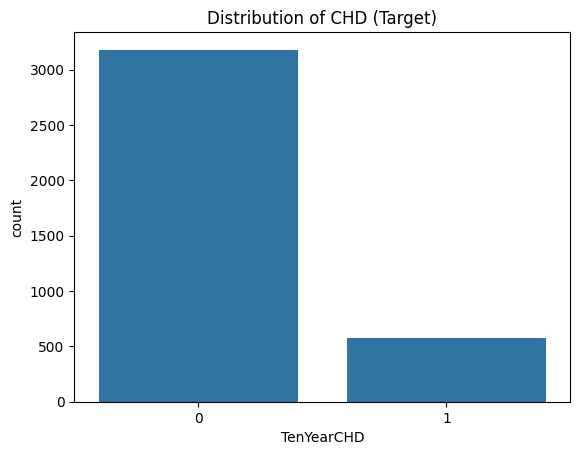

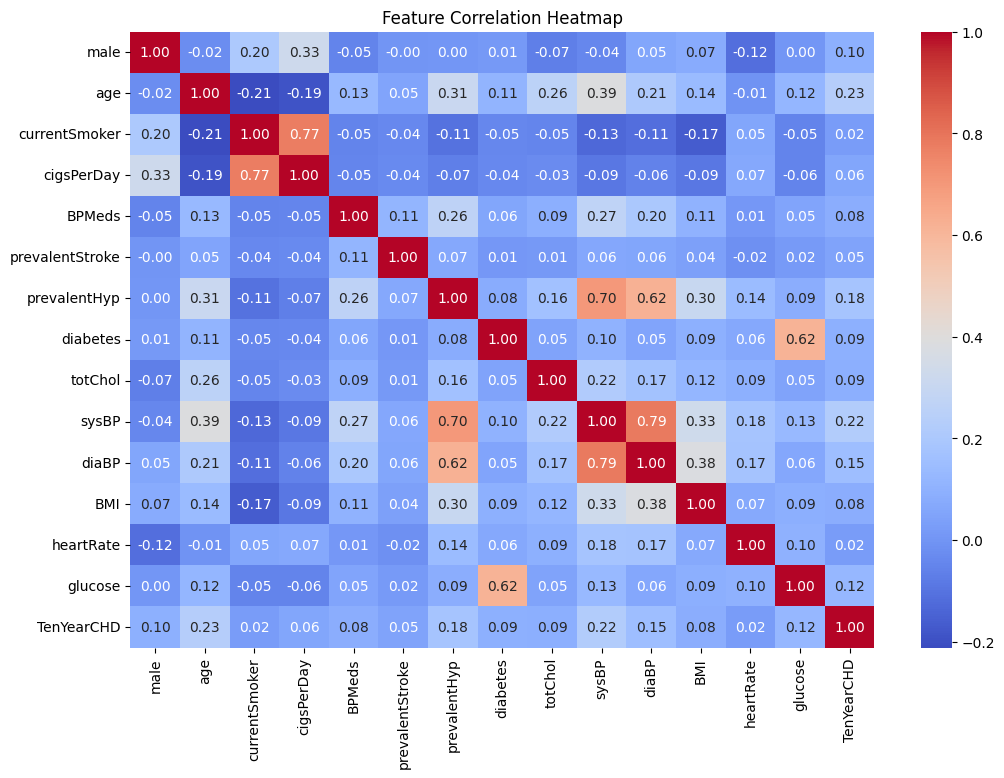

Accuracy: 0.8490230905861457
Precision: 0.5833333333333334
Recall: 0.040697674418604654
F1 Score: 0.07608695652173914

Confusion Matrix:
 [[949   5]
 [165   7]]
ROC-AUC Score: 0.7360684510750328


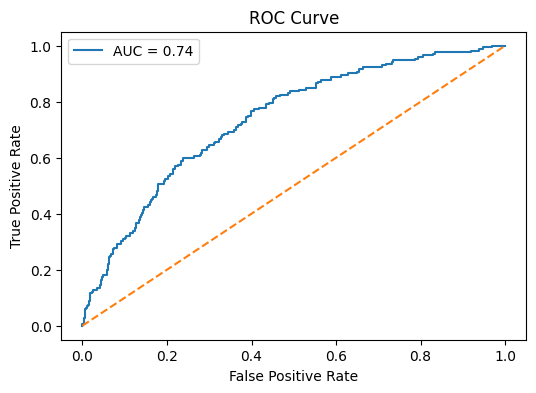


New Patient CHD Prediction: Negative
Probability of CHD: 0.33


In [1]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# 2. Load Dataset
df = pd.read_csv("/content/framingham.csv")

# Drop the 'education' column and rename columns (optional)
df.drop(columns=["education"], inplace=True)
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# 3. Data Preprocessing
# Handle missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Exploratory Data Analysis (optional visualization section)
# Class distribution
sns.countplot(x=y)
plt.title("Distribution of CHD (Target)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Model Training - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 6. Model Evaluation
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 7. Predict on New Patient (example input)
new_patient = pd.DataFrame([{
    'male': 1,
    'age': 55,
    'currentSmoker': 1,
    'cigsPerDay': 20,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 1,
    'diabetes': 0,
    'totChol': 250,
    'sysBP': 140,
    'diaBP': 90,
    'BMI': 28.5,
    'heartRate': 80,
    'glucose': 100
}])

new_patient_scaled = scaler.transform(new_patient)
prediction = log_reg.predict(new_patient_scaled)
probability = log_reg.predict_proba(new_patient_scaled)[0][1]

print("\nNew Patient CHD Prediction:", "Positive" if prediction[0] == 1 else "Negative")
print(f"Probability of CHD: {probability:.2f}")
